In [366]:
#Observable Trends

#1 Referencing the first scatter plot, it is clear that city temperatures increase as latitude approaches zero 
#  (equator) from either north or south pole.

#2 There doesn't appear to be a significant relationship between latitude and other variables: humidity, cloudiness, 
#  and wind speed. 

#3 Most cities have humidity levels above 60%.

#4 There are noticeable clusters of cities at approximately 0%, 20%, 40%, 75%, and 100% cloudiness. 
#  This could be due to method of data collection and measurement.

#5 Most cities have wind speeds from 0-8mph. Very few cities have wind speeds greater than 8mph.

#Dependencies and setup
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
import time
from pprint import pprint

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Import API key
from wconfig import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [367]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


628

In [368]:
#Create dataframe using list of cities and add placeholder columns
cities_df = pd.DataFrame(cities, columns=["City"])
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""

#Preview dataframe
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,maracaibo,,,,,,,,
1,hilo,,,,,,,,
2,klaksvik,,,,,,,,
3,hobart,,,,,,,,
4,cape town,,,,,,,,


In [369]:
#Create variable to hold base url for api calls
base_url = "https://api.openweathermap.org/data/2.5/weather?"

In [370]:
#Create print statement to signify start of API calls
print("Beginning Data Retrieval")

#Create successive API calls, adding needed data into each row and column.
for index, row in cities_df.iterrows():
    df_city = row["City"]
    params = {"q": df_city, "APPID": api_key, "units": "imperial"}
    city_weather = requests.get(base_url, params=params)
    city_weather = city_weather.json()
    
    try:
        cities_df.loc[index, "Cloudiness"] = float(city_weather["clouds"]["all"])
        cities_df.loc[index, "Country"] = city_weather["sys"]["country"]
        cities_df.loc[index, "Date"] = city_weather["dt"]
        cities_df.loc[index, "Humidity"] = float(city_weather["main"]["humidity"])
        cities_df.loc[index, "Lat"] = float(city_weather["coord"]["lat"])
        cities_df.loc[index, "Lng"] = float(city_weather["coord"]["lon"])
        cities_df.loc[index, "Max Temp"] = float(city_weather["main"]["temp_max"])
        cities_df.loc[index, "Wind Speed"] = float(city_weather["wind"]["speed"])
        print("Processing Record " + str(index+1) + " of Set " + str(len(cities)) + " | " + str(cities_df.loc[index, "City"]))
    except (KeyError, IndexError):
        cities_df.loc[index, "Cloudiness"] = np.NaN
        cities_df.loc[index, "Country"] = np.NaN
        cities_df.loc[index, "Date"] = np.NaN
        cities_df.loc[index, "Humidity"] = np.NaN
        cities_df.loc[index, "Lat"] = np.NaN
        cities_df.loc[index, "Lng"] = np.NaN
        cities_df.loc[index, "Max Temp"] = np.NaN
        cities_df.loc[index, "Wind Speed"] = np.NaN
        print("City not found. Skipping...")
    time.sleep(2.5)

print("Data Retrieval Complete")


Beginning Data Retrieval
Processing Record 1 of Set 628 | maracaibo
Processing Record 2 of Set 628 | hilo
Processing Record 3 of Set 628 | klaksvik
Processing Record 4 of Set 628 | hobart
Processing Record 5 of Set 628 | cape town
Processing Record 6 of Set 628 | castro
Processing Record 7 of Set 628 | kruisfontein
City not found. Skipping...
Processing Record 9 of Set 628 | butaritari
Processing Record 10 of Set 628 | jamestown
Processing Record 11 of Set 628 | berlevag
Processing Record 12 of Set 628 | porosozero
City not found. Skipping...
Processing Record 14 of Set 628 | dunedin
Processing Record 15 of Set 628 | vila velha
City not found. Skipping...
Processing Record 17 of Set 628 | bluff
Processing Record 18 of Set 628 | victoria
Processing Record 19 of Set 628 | cockburn town
Processing Record 20 of Set 628 | santa ines
Processing Record 21 of Set 628 | salinas
Processing Record 22 of Set 628 | kodiak
Processing Record 23 of Set 628 | fortuna
Processing Record 24 of Set 628 | r

Processing Record 195 of Set 628 | guane
Processing Record 196 of Set 628 | yumen
Processing Record 197 of Set 628 | atasu
Processing Record 198 of Set 628 | nikolskoye
Processing Record 199 of Set 628 | nemuro
Processing Record 200 of Set 628 | hirara
Processing Record 201 of Set 628 | tailai
City not found. Skipping...
City not found. Skipping...
Processing Record 204 of Set 628 | matagami
City not found. Skipping...
Processing Record 206 of Set 628 | salem
Processing Record 207 of Set 628 | guerrero negro
Processing Record 208 of Set 628 | pilibanga
Processing Record 209 of Set 628 | sharjah
Processing Record 210 of Set 628 | nikolayevsk-na-amure
Processing Record 211 of Set 628 | roma
Processing Record 212 of Set 628 | forestville
Processing Record 213 of Set 628 | lahad datu
Processing Record 214 of Set 628 | pandan
Processing Record 215 of Set 628 | susangerd
Processing Record 216 of Set 628 | hami
Processing Record 217 of Set 628 | hasaki
Processing Record 218 of Set 628 | asosa

Processing Record 388 of Set 628 | romitan
Processing Record 389 of Set 628 | mitsamiouli
Processing Record 390 of Set 628 | japura
Processing Record 391 of Set 628 | brazzaville
City not found. Skipping...
Processing Record 393 of Set 628 | aklavik
Processing Record 394 of Set 628 | bartica
Processing Record 395 of Set 628 | katsuura
Processing Record 396 of Set 628 | aykhal
Processing Record 397 of Set 628 | saint george
City not found. Skipping...
Processing Record 399 of Set 628 | bonnyville
Processing Record 400 of Set 628 | isangel
Processing Record 401 of Set 628 | northam
Processing Record 402 of Set 628 | kjopsvik
Processing Record 403 of Set 628 | ravar
Processing Record 404 of Set 628 | aras
City not found. Skipping...
Processing Record 406 of Set 628 | lotofaga
Processing Record 407 of Set 628 | vanavara
Processing Record 408 of Set 628 | maningrida
City not found. Skipping...
Processing Record 410 of Set 628 | chifeng
City not found. Skipping...
Processing Record 412 of Se

Processing Record 582 of Set 628 | suntar
Processing Record 583 of Set 628 | ostrovnoy
Processing Record 584 of Set 628 | luderitz
Processing Record 585 of Set 628 | waingapu
Processing Record 586 of Set 628 | goba
Processing Record 587 of Set 628 | nagua
Processing Record 588 of Set 628 | menongue
Processing Record 589 of Set 628 | kuching
Processing Record 590 of Set 628 | kvam
Processing Record 591 of Set 628 | majene
Processing Record 592 of Set 628 | narasannapeta
Processing Record 593 of Set 628 | banepa
Processing Record 594 of Set 628 | surab
Processing Record 595 of Set 628 | sinop
Processing Record 596 of Set 628 | bestobe
Processing Record 597 of Set 628 | natal
Processing Record 598 of Set 628 | casas grandes
Processing Record 599 of Set 628 | arawa
Processing Record 600 of Set 628 | mutoko
Processing Record 601 of Set 628 | nabire
Processing Record 602 of Set 628 | acajutla
Processing Record 603 of Set 628 | karasburg
Processing Record 604 of Set 628 | sancoale
Processing 

In [371]:
#Export completed dataframe to csv file
cities_df.to_csv("output_data/cities.csv")

In [372]:
#Preview completed dataframe
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,maracaibo,20,CO,1566176363,57,3.41,-75.78,80.6,11.41
1,hilo,40,US,1566176366,55,19.71,-155.08,87.8,6.93
2,klaksvik,100,FO,1566176368,93,62.23,-6.59,51.8,13.87
3,hobart,40,AU,1566176371,52,-42.88,147.33,48,17.22
4,cape town,40,ZA,1566176284,82,-33.93,18.42,57.99,9.17


In [373]:
#set variables for scatter plots
latitude = cities_df["Lat"]
temperature = cities_df["Max Temp"]
humidity = cities_df["Humidity"]
cloudiness = cities_df["Cloudiness"]
wind_speed = cities_df["Wind Speed"]

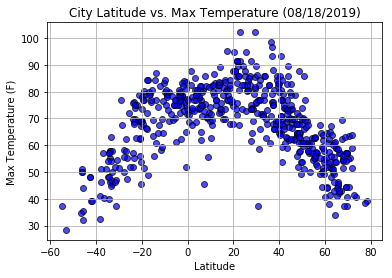

In [374]:
#Create and display Latitude vs. Max Temperature scatter plot
lat_vs_temp = plt.scatter(latitude, temperature, marker="o", alpha=0.7, facecolors="blue", edgecolors="black", linewidth=1)
    
plt.title("City Latitude vs. Max Temperature (08/18/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()

#Save scatter plot image
plt.savefig("latitude_vs_maxtemp.png")

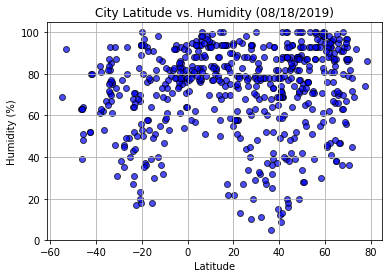

In [375]:
#Create and display Latitude vs. Humidity scatter plot
lat_vs_humidity = plt.scatter(latitude, humidity, marker="o", alpha=0.7, facecolors="blue", edgecolors="black", linewidth=1)

plt.title("City Latitude vs. Humidity (08/18/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()

#Save scatter plot image
plt.savefig("latitude_vs_humidity.png")

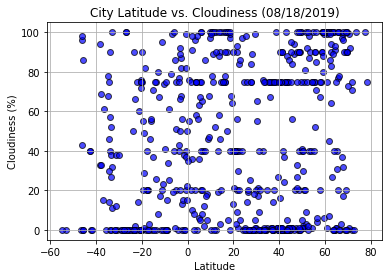

In [376]:
#Create and display Latitude vs. Cloudiness scatter plot
lat_vs_cloud = plt.scatter(latitude, cloudiness, marker="o", alpha=0.7, facecolors="blue", edgecolors="black", linewidth=1)

plt.title("City Latitude vs. Cloudiness (08/18/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()

#Save scatter plot image
plt.savefig("latitude_vs_cloudiness.png")

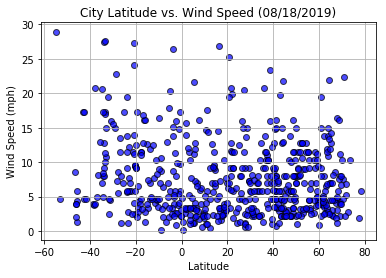

In [377]:
#Create and display Latitude vs. Wind Speed scatter plot
lat_vs_wind = plt.scatter(latitude, wind_speed, marker="o", alpha=0.7, facecolors="blue", edgecolors="black", linewidth=1)

plt.title("City Latitude vs. Wind Speed (08/18/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()

#Save scatter plot image
plt.savefig("latitude_vs_windspeed.png")

